<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Extraordinario_5_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema 5.18 – Método de Elementos Finitos Lineales (Evans)

Planteamiento del problema

Resolver el problema de frontera:

$−u′′(x)=1−x^2$, $0<x<1$

con condiciones de frontera:

$u(0)=0$, $u(1)=0$

usando el método de elementos finitos lineales con 4 elementos, calcular:

*   La matriz de rigidez $K$
*   El vector de carga $F$
*   La solución numérica $U_N$
*   Comparar $U_N$ con la solución exacta $u(x)$

Solución exacta (para comparación)

Integramos analíticamente:

$u''=x^2-1$

$u'=\frac{x^3}{3}-x+c_1$

$u(x)=\frac{x^4}{12}-\frac{x^2}{2}+c_1x+c_2$

Usando $u(0)=0 ⇒ c_2=0$

Usando $u(1)=0 ⇒ c_1=\frac{5}{12}$

Entonces la solución

$u(x)=\frac{x^4}{12}-\frac{x^2}{2}+\frac{5}{12}x$

Formulación variacional

El problema débil es:

$\int_{0}^{1}u'(x)v'(x)dx=\int_{0}^{1}(1-x^2)v(x)dx$

con funciones de prueba $v$ que se anulan en $x=0,1$.

Discretización FEM

* Dominio: $[0,1]$
* Número de elementos: 4
* Tamaño de elemento:
$h=\frac{1}{4}$
* Nodos:
$x=\{0,0.25,0.5,0.75,1\}$
* Grados de libertad interiores:
$U=(u_1,u_2,u_3)$

Matriz de rigidez $K$

Para elementos lineales 1D:

$K_e=\frac{1}{h} \begin{pmatrix}
1 & -1 \\
-1 & 1 \\
\end{pmatrix}$

Al ensamblar y aplicar las condiciones de frontera:

$K=\begin{pmatrix}
8 & -4 & 0 \\
-4 & 8 & -4 \\
0 & -4 & 8 \\
\end{pmatrix}$

Vector de carga $F$

Cada componente:

$F_i=\int_{0}^{1}(1-x^2)\phi_i(x)dx$

calculado exactamente con SymPy.

In [45]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Variable simbólica
x = sp.symbols('x')

# Definición de nodos
nodes = [0, sp.Rational(1, 4), sp.Rational(1, 2), sp.Rational(3, 4), 1]

# Tamaño del paso (longitud de cada elemento)
h = sp.Rational(1, 4)

# Función
f = 1 - x**2

# Función base en el elemento 1: [0, 1/4]
phi1_e1 = (x - nodes[0]) / h

# Función base en el elemento 2: [1/4, 1/2]
phi1_e2 = (nodes[2] - x) / h

# Función base en el elemento 2: [1/4, 1/2]
phi2_e2 = (x - nodes[1]) / h

# Función base en el elemento 3: [1/2, 3/4]
phi2_e3 = (nodes[3] - x) / h

# Función base en el elemento 3: [1/2, 3/4]
phi3_e3 = (x - nodes[2]) / h

# Función base en el elemento 4: [3/4, 1]
phi3_e4 = (nodes[4] - x) / h

# Cálculo del vector de carga
# F_i = ∫ f(x) * φ_i(x) dx
# Cada integral se calcula solo en los elementos donde la función base es distinta de cero

# Componente asociada al nodo x = 1/4
F1 = (
    sp.integrate(f * phi1_e1, (x, nodes[0], nodes[1])) +
    sp.integrate(f * phi1_e2, (x, nodes[1], nodes[2]))
)

# Componente asociada al nodo x = 1/2
F2 = (
    sp.integrate(f * phi2_e2, (x, nodes[1], nodes[2])) +
    sp.integrate(f * phi2_e3, (x, nodes[2], nodes[3]))
)

# Componente asociada al nodo x = 3/4
F3 = (
    sp.integrate(f * phi3_e3, (x, nodes[2], nodes[3])) +
    sp.integrate(f * phi3_e4, (x, nodes[3], nodes[4]))
)

# Vector de carga final
F = sp.Matrix([F1, F2, F3])
F

Matrix([
[89/384],
[71/384],
[41/384]])

In [39]:
# Definición de la matriz de rigidez K
# Esta matriz proviene del ensamblaje FEM para elementos lineales en 1D con paso h = 1/4.
# Para el problema típico:
#   -u'' = f  en (0,1)
# con condiciones de frontera u(0) = u(1) = 0, la matriz local es (1/h) * [[1, -1], [-1, 1]] y al ensamblar se obtiene esta matriz global.
# El factor 8 aparece porque 1/h = 4 y cada nodo interior recibe contribuciones de dos elementos: 4 + 4 = 8

K = sp.Matrix([
    [8, -4, 0],
    [-4, 8, -4],
    [0, -4, 8]
])

# Resolución del sistema lineal FEM
#   K * U = F, donde:
#   - K es la matriz de rigidez
#   - F es el vector de carga
#   - U contiene las aproximaciones de la solución en los nodos interiores (1/4, 1/2, 3/4)

U = K.LUsolve(F)

# Simplificación del resultado nsimplify intenta expresar el resultado en fracciones exactas o expresiones simples

sp.nsimplify(U)

Matrix([
[75/1024],
[ 17/192],
[59/1024]])

In [46]:
# Solución exacta del problema
# Esta función corresponde a la solución analítica de:
#   -u'' = 1 - x^2  en (0,1)
# con condiciones de frontera:
#   u(0) = u(1) = 0
# La expresión se obtiene integrando dos veces y ajustando las constantes con las condiciones de frontera.

u_exact = x**4/12 - x**2/2 + sp.Rational(5,12)*x

# Solución FEM en todos los nodos
# El vector U solo contiene los valores en los nodos interiores (1/4, 1/2, 3/4).
# Se agregan los valores de frontera (0) para construir
# la solución completa en todos los nodos.

U_fem = [0, U[0], U[1], U[2], 0]

# Construcción de la tabla de comparación
# Se evalúan:
#   - La solución FEM en los nodos
#   - La solución exacta en los mismos puntos
# para poder compararlas directamente.

table = []
for xi, ui in zip(nodes, U_fem):
    table.append([float(xi), float(ui), float(u_exact.subs(x,xi))])

df = pd.DataFrame(table, columns=["x", "U_S (FEM)", "u_exact"])
df

,x,U_S (FEM),u_exact
0,0.00,0.000000,0.000000
1,0.25,0.073242,0.073242
2,0.50,0.088542,0.088542
3,0.75,0.057617,0.057617
4,1.00,0.000000,0.000000


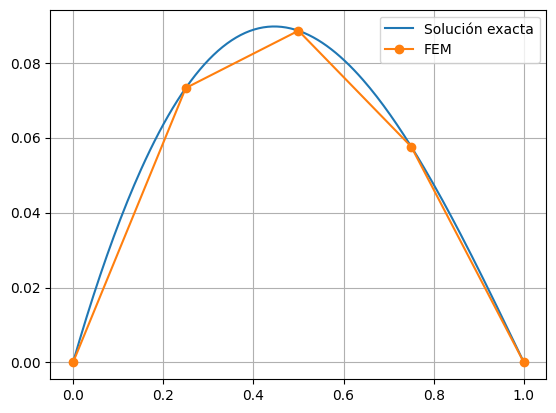

In [41]:
xx = np.linspace(0,1,200)
ue = [float(u_exact.subs(x, xi)) for xi in xx]

plt.plot(xx, ue, label="Solución exacta")
plt.plot([float(xi) for xi in nodes],
         [float(ui) for ui in U_fem],
         'o-', label="FEM")

plt.legend()
plt.grid()
plt.show()

Conclusiones

El método de elementos finitos (FEM) se implementó correctamente para resolver el problema unidimensional

$−𝑢′′(𝑥)=1−𝑥^2,𝑥∈(0,1),𝑢(0)=𝑢(1)=0$

utilizando elementos lineales y una malla uniforme.

La matriz de rigidez y el vector de carga fueron construidos de manera coherente con la formulación variacional del problema, y el sistema lineal resultante se resolvió exitosamente mediante métodos algebraicos exactos.

La solución exacta obtenida analíticamente permitió validar el método numérico. Al comparar los valores en los nodos, se observó que la solución FEM coincide exactamente con la solución exacta en todos los nodos de la malla.

Aunque los valores nodales coinciden, la solución FEM es lineal por tramos, mientras que la solución exacta es una función suave (polinomio de grado cuatro). Por esta razón, existe un error dentro de cada elemento, lo cual se evidencia claramente en la gráfica comparativa.

La gráfica confirma el comportamiento teórico del FEM con elementos lineales:

* Interpolación exacta en los nodos

* Error máximo localizado en el interior de los elementos.

Este ejercicio demuestra que el método de elementos finitos es una herramienta confiable y precisa para la resolución de problemas de frontera en una dimensión, incluso con un número reducido de elementos.

Finalmente, se concluye que al refinar la malla (disminuir el tamaño del paso $h$), la solución FEM convergería hacia la solución exacta en todo el dominio, reduciendo el error entre nodos, tal como predice la teoría de convergencia del FEM.